In [1]:
# Loading the required Python libraries/packages

# To create the interactive components
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#To ignore warnings (if any) while displaying outputs
import warnings
warnings.filterwarnings('ignore')

# For data loading and manipulation
import pandas as pd
import numpy as np
from sklearn import datasets

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For data science and machine learning techniques
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [2]:
# Read the train and test datasets from Kaggle to create two DataFrames using Pandas
glass_df = pd.read_csv("glass_data.csv")
glass_df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass_df.columns=["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]

In [4]:
glass_df.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
ID      214 non-null int64
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Text(0.5, 1.0, 'Count of Glass Types')

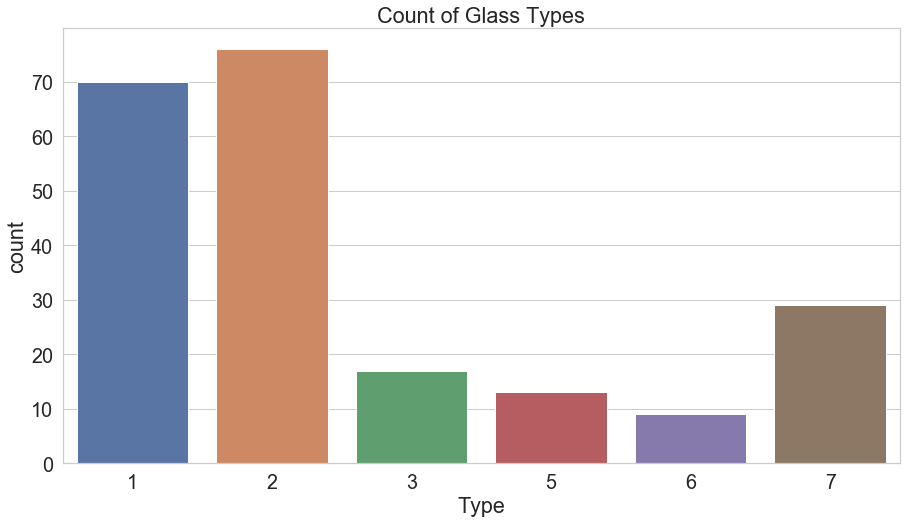

In [6]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=glass_df).set_title('Count of Glass Types')

In [7]:
# Checked both mean and median. mean seemed more informative
glass_df.groupby('Type', as_index=False).mean()

,Type,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,35.5,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


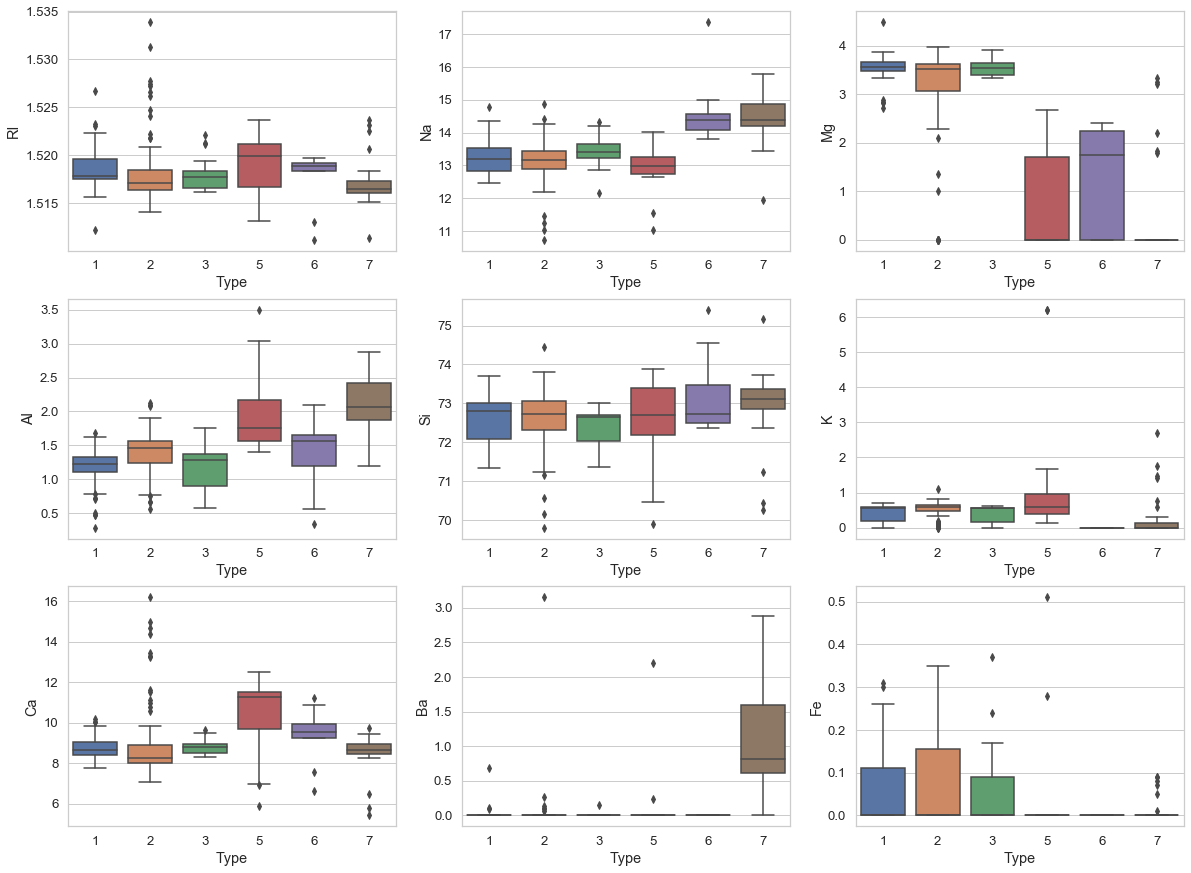

In [8]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

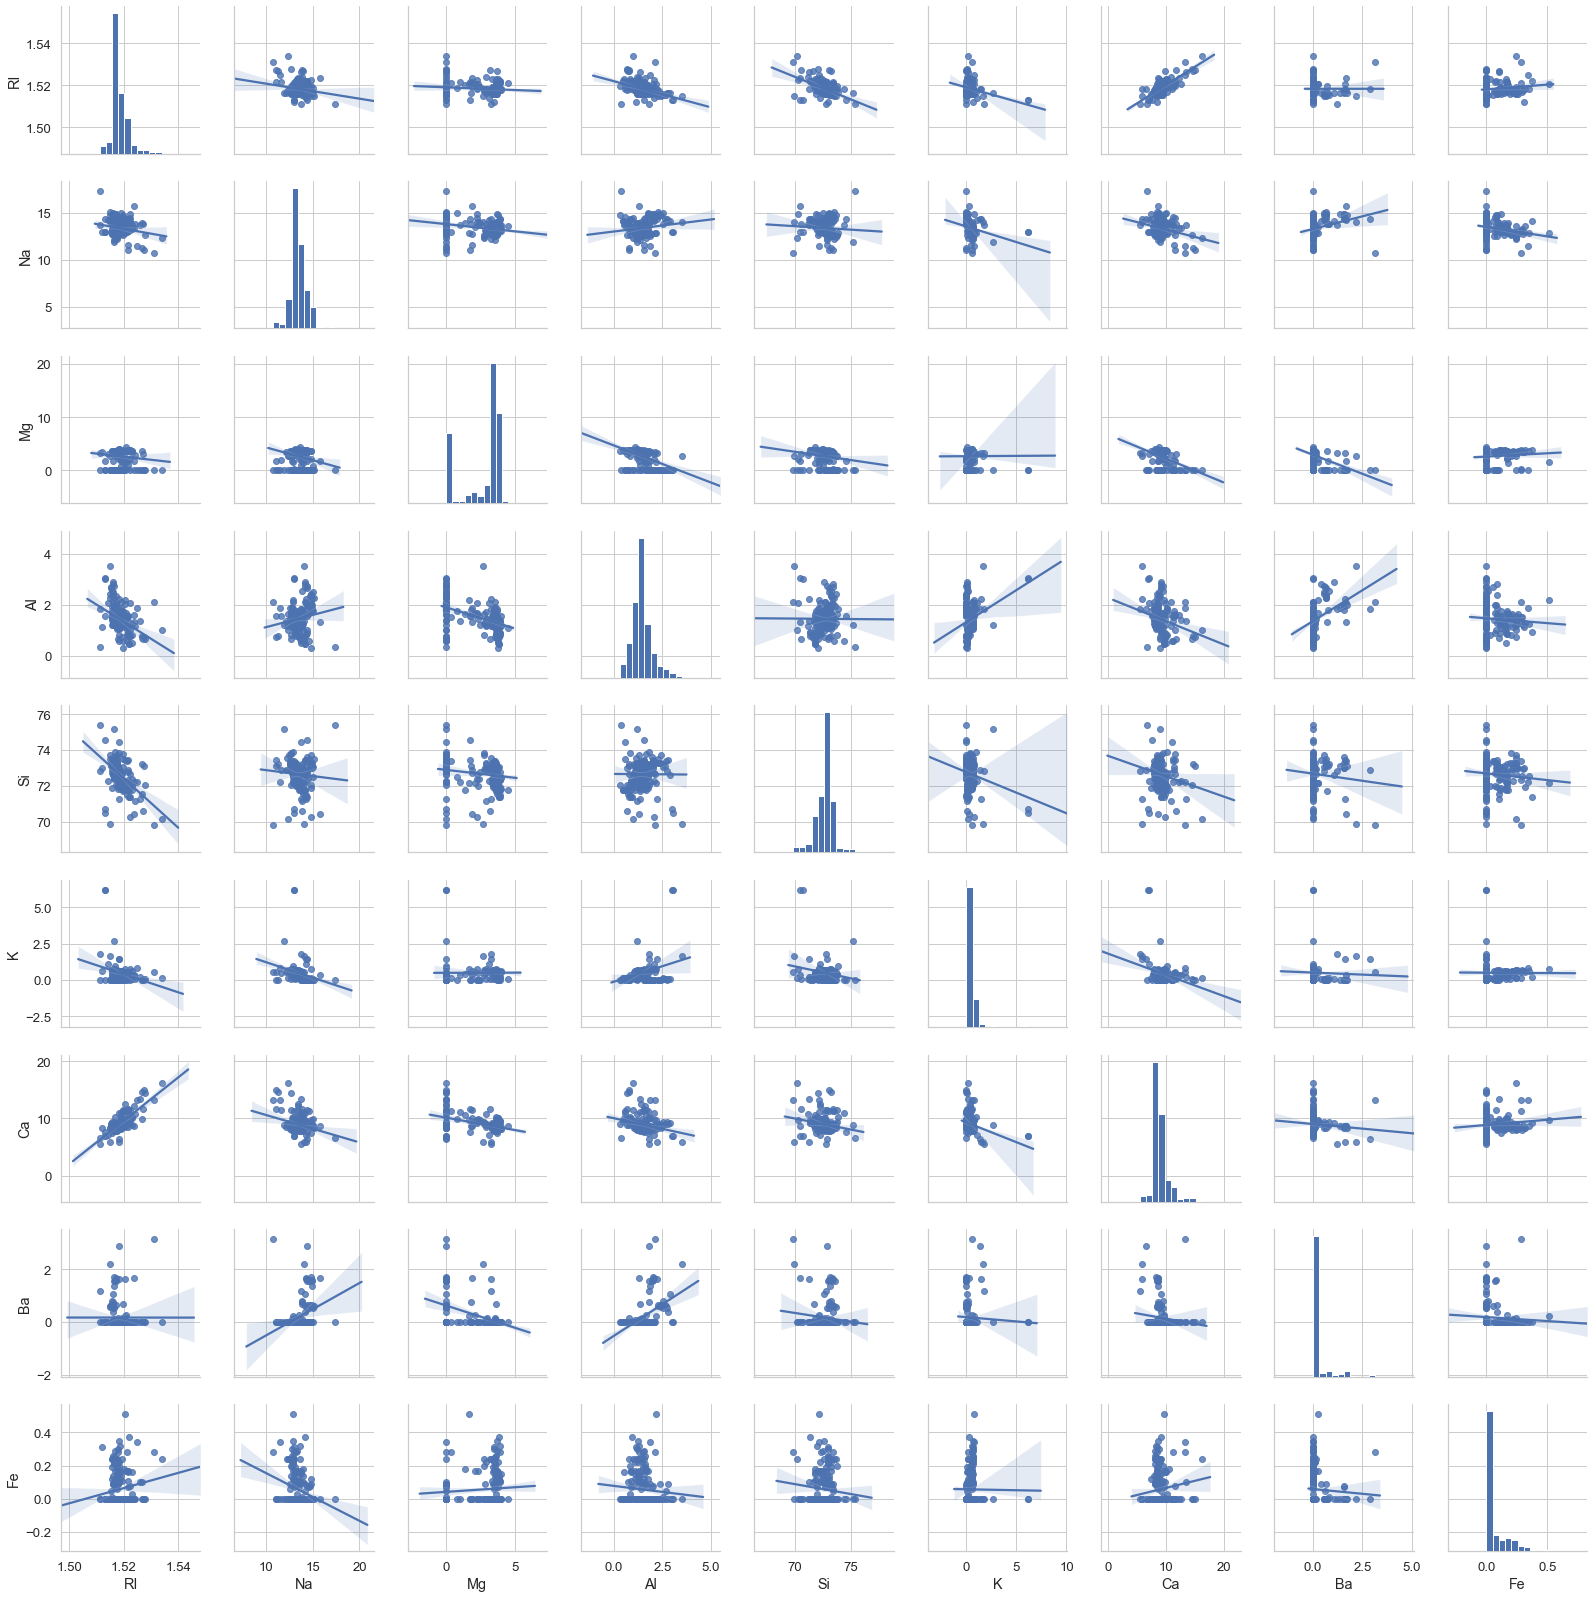

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']], kind='reg')

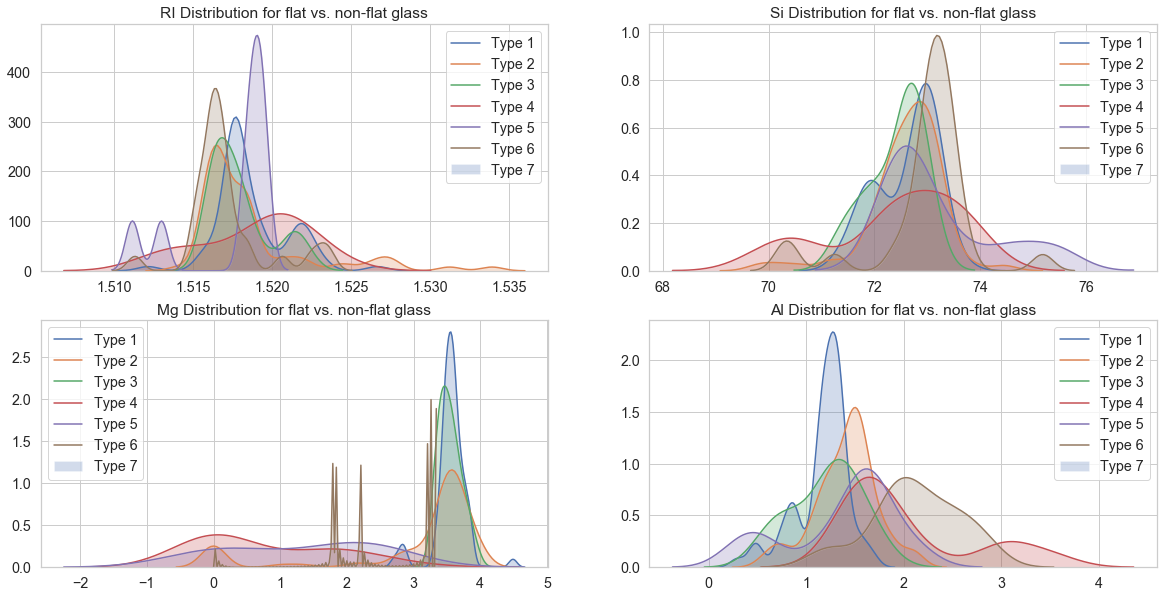

In [10]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))

plt.subplot(2,2,1)
sns.kdeplot(glass_df["RI"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["RI"][glass_df.Type == 7], shade = True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

plt.subplot(2,2,2)
sns.kdeplot(glass_df["Si"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["Si"][glass_df.Type == 7], shade = True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

plt.subplot(2,2,3)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["Mg"][glass_df.Type == 7], shade = True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

plt.subplot(2,2,4)
sns.kdeplot(glass_df["Al"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["Al"][glass_df.Type == 7], shade = True)
plt.title("Al Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

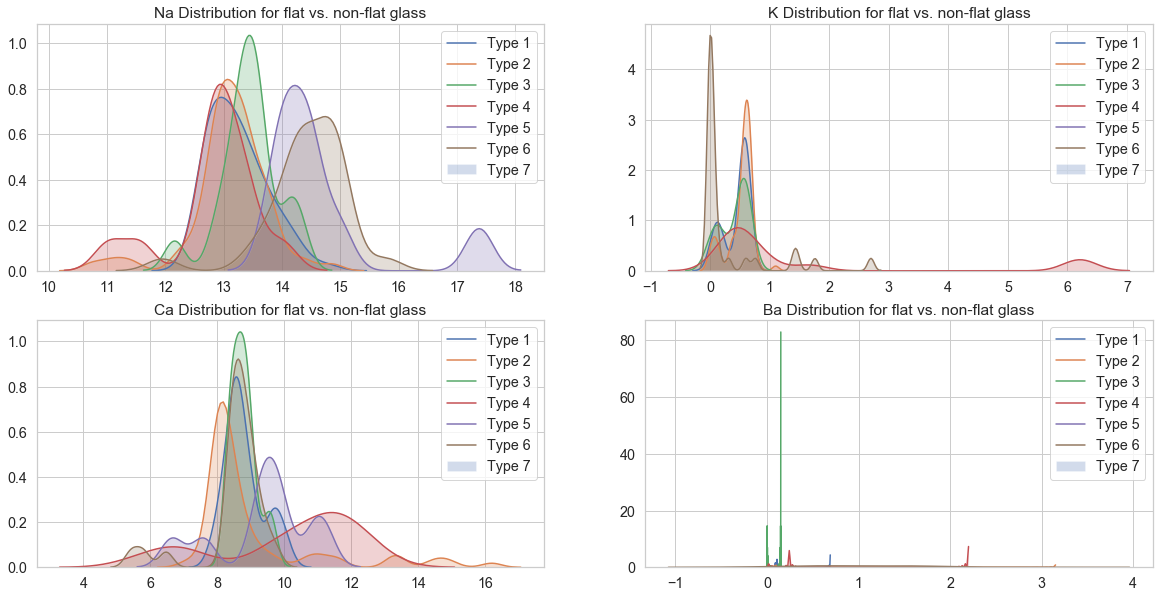

In [11]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))

plt.subplot(2,2,1)
sns.kdeplot(glass_df["Na"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Na"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Na"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["Na"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["Na"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["Na"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["Na"][glass_df.Type == 7], shade = True)
plt.title("Na Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

plt.subplot(2,2,2)
sns.kdeplot(glass_df["K"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["K"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["K"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["K"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["K"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["K"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["K"][glass_df.Type == 7], shade = True)
plt.title("K Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

plt.subplot(2,2,3)
sns.kdeplot(glass_df["Ca"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Ca"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Ca"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["Ca"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["Ca"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["Ca"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["Ca"][glass_df.Type == 7], shade = True)
plt.title("Ca Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

plt.subplot(2,2,4)
sns.kdeplot(glass_df["Ba"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Ba"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Ba"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["Ba"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["Ba"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["Ba"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["Ba"][glass_df.Type == 7], shade = True)
plt.title("Ba Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

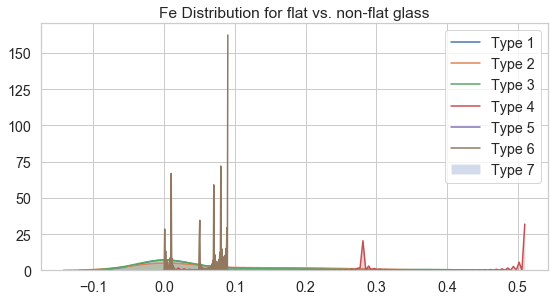

In [12]:
sns.set(style="whitegrid", font_scale=1.3)
plt.subplots(figsize = (20,10))

plt.subplot(2,2,1)
sns.kdeplot(glass_df["Fe"][glass_df.Type == 1], shade = True)
sns.kdeplot(glass_df["Fe"][glass_df.Type == 2], shade = True)
sns.kdeplot(glass_df["Fe"][glass_df.Type == 3], shade = True)
sns.kdeplot(glass_df["Fe"][glass_df.Type == 4], shade = True)
sns.kdeplot(glass_df["Fe"][glass_df.Type == 5], shade = True)
sns.kdeplot(glass_df["Fe"][glass_df.Type == 6], shade = True)
sns.kdeplot(glass_df["Fe"][glass_df.Type == 7], shade = True)
plt.title("Fe Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5', 'Type 6', 'Type 7'])

In [13]:
glass_df.drop(columns = ['ID'])

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


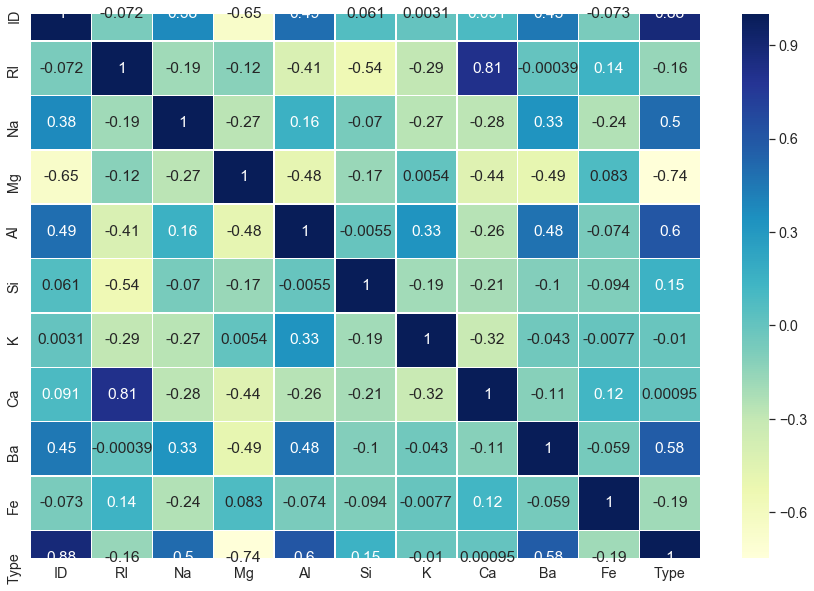

In [14]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_df.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

                     P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.0  1.66  0.68  0.64  0.21  0.1  0.01  0.0  0.0


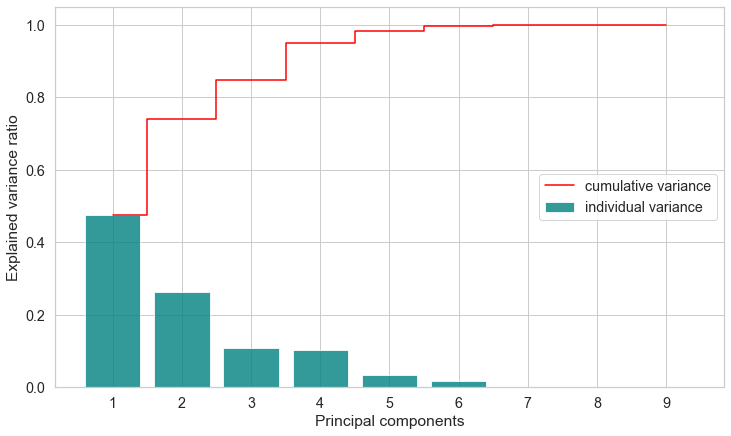

In [15]:
# Performing PCA
X_var = glass_df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

In [16]:
pca_red = PCA(n_components=9)
X_reduced = pca_red.fit_transform(X_var)

In [17]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = glass_df["Type"].values

In [18]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
glassclassifier = GaussianNB()
glassclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
# Predicting the Training set results
y_pred_Train = glassclassifier.predict(X_train)
print(y_pred_Train)

[2 2 5 1 1 1 1 7 1 1 1 2 1 1 1 1 7 1 2 7 1 1 1 2 7 2 3 1 1 1 2 2 1 1 1 6 1
 1 1 1 7 2 3 7 2 1 7 5 1 1 1 7 1 1 1 7 5 2 5 1 1 7 1 1 1 1 1 3 2 2 1 1 1 1
 1 7 1 1 1 1 5 7 1 1 1 1 3 2 1 1 5 2 3 2 1 1 3 3 1 7 1 1 1 1 7 1 2 3 1 2 1
 1 7 2 1 3 7 3 1 1 1 1 2 2 1 2 2 3 1 6 2 3 7 5 7 1 1 3 1 3 1 2 3 1 1 7 3 1
 2 3 7 7 6 1 1 2 2 7 3 2 7 1 1 2 5 1 2 1 2 1 1]


In [52]:
# Predicting the Test set results
y_pred_Test = glassclassifier.predict(X_test)
print(y_pred_Test)

[5 3 1 1 2 2 2 3 2 7 1 7 5 1 1 7 1 1 1 1 1 1 2 1 1 1 2 1 7 2 1 1 7 1 7 1 7
 2 1 1 2 5 7]


In [55]:
#Actual Versus Predicted Value
compared_values = np.vstack((y_test,y_pred)).T

#The Actual value on the left side and predicted value on the right

#The sample printed is only for the top 5 values predicted
compared_values[:5,:]

array([[1, 7],
       [3, 3],
       [2, 2],
       [1, 1],
       [5, 5]], dtype=int64)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  1  1  0  0]
 [11  6  0  2  0  0]
 [ 0  0  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  0  0  0  2]
 [ 0  0  0  0  0  6]]


In [36]:
from sklearn.metrics import accuracy_score

# The accuracy of the gaussian classifier model is calculated
sc1 = metrics.accuracy_score(y_pred,y_test)
print(sc1)

0.7209302325581395


In [37]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# XGBoost CLassifier
xgbMod = XGBClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
xgbMod.fit(X_train,y_train)
y_pred = xgbMod.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc5 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc6 = metrics.accuracy_score(y_pred,y_test)

In [39]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(xgbMod.feature_importances_)
print(gbmMod.feature_importances_)
print(RandFor.feature_importances_)

[0.14770697 0.20571744 0.08981594 0.11200126 0.09189313 0.11410823
 0.07993128 0.04848167 0.11034408]
[0.18977429 0.26888697 0.04039459 0.15154383 0.09969825 0.1193624
 0.04326537 0.03435541 0.05271887]
[0.14959173 0.22057904 0.07155596 0.11709715 0.07673132 0.08561932
 0.09823486 0.05920427 0.12138631]
[0.23967481 0.21283657 0.05872951 0.13855644 0.06939318 0.05631139
 0.05669101 0.0570135  0.11079359]
[0.18977429 0.26888697 0.04039459 0.15154383 0.09969825 0.1193624
 0.04326537 0.03435541 0.05271887]


In [40]:
# Compare accuracy of models
pd.DataFrame([['Multi-Class Gaussian Classifer',sc1],['Support Vector Machine',sc2],['XG Boost',sc3],['Gradient Boost',sc4],
                             ['Decision Tree',sc5],['Random Forest',sc6]],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Multi-Class Gaussian Classifer,0.720930
1,Support Vector Machine,0.744186
2,XG Boost,0.697674
3,Gradient Boost,0.744186
4,Decision Tree,0.674419
5,Random Forest,0.720930


In [41]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=9, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


C:\Users\abiol\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.7209302325581395

Text(154.372, 0.5, 'predicted label')

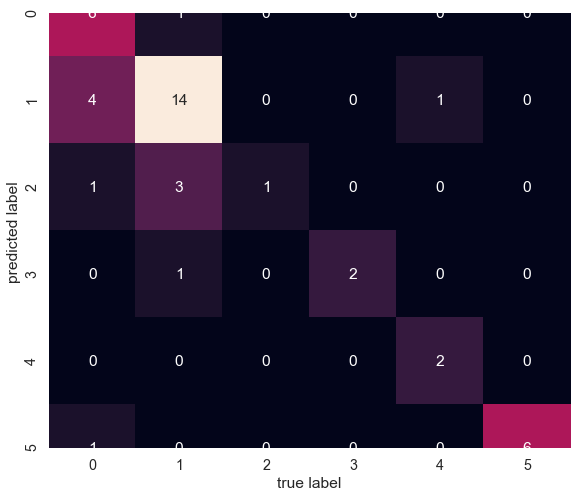

In [43]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.86      0.50      0.63        12
           2       0.74      0.74      0.74        19
           3       0.20      1.00      0.33         1
           5       0.67      1.00      0.80         2
           6       1.00      0.67      0.80         3
           7       0.86      1.00      0.92         6

    accuracy                           0.72        43
   macro avg       0.72      0.82      0.70        43
weighted avg       0.79      0.72      0.73        43



In [48]:
# Training the model with the entire data (Since cross-validation is already done)
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')
svm_mod.fit(X_var.iloc[:,0:9],y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
# Function to be invoked when the slider values are changed
from IPython.display import display
def f(RI,Na,Mg,Al,Si,K,Ca,Ba,Fe):
    y_val = svm_mod.predict([[RI,Na,Mg,Al,Si,K,Ca,Ba,Fe]])
    print("The Glass Type is {}".format(y_val))

In [50]:
# Change the values on the slider
interact(f, RI=(1.50,1.54,0.0001),Na=(10.7,17.4),Mg=(0,4.5),Al=(0,3.5),Si=(69,76),K=(0.00,6.21),Ca=(5.41,16.19),Ba=(0.00,3.15),Fe=(0.00,0.51))

interactive(children=(FloatSlider(value=1.52, description='RI', max=1.54, min=1.5, step=0.0001), FloatSlider(v…

<function __main__.f(RI, Na, Mg, Al, Si, K, Ca, Ba, Fe)>